G2M insight for Cab Investment firm

G2M Case Study

Project detail:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights.

Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

Review the Source Documentation
Understand the field names and data types
Identify relationships across the files
Field/feature transformations
Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship
Identify and remove duplicates
Perform other analysis like NA value and outlier detection

import required Libraries

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cab_df=pd.read_csv("Cab_Data.csv")
transaction_df=pd.read_csv("Transaction_ID.csv")
city_df=pd.read_csv("City.csv")
customer_df=pd.read_csv("Customer_ID.csv")

In [3]:
cab_df.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

The date of travel column format is not correct. Work to change date time format

Profit=Price Charged-Cost of Trip

In [4]:
transaction_df.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [5]:
city_df.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [6]:
customer_df.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [7]:
# printing the shape of the each dataframe
print("Shape of cab data", cab_df.shape)
print("Shape of the transaction data", transaction_df.shape)
print("shape of the customer data", customer_df.shape)
print("print the shape of city data", city_df.shape)

Shape of cab data (359392, 7)
Shape of the transaction data (440098, 3)
shape of the customer data (49171, 4)
print the shape of city data (20, 3)


In [8]:
# checking the basic information of each dataframe

print(cab_df.info())
print(customer_df.info())
print(city_df.info())
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int6

Data cleaning

1. Renaming column name to make sure the data consistency, compatability, ease of use and compatability

In [9]:
for col in cab_df.columns:
    if ' ' in col:
        cab_df=cab_df.rename(columns={col:col.replace(' ','_')})

In [10]:
cab_df.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

Repeating the same step for the remaining dataframe objects

In [11]:
for col in transaction_df.columns:
    if ' ' in col:
        transaction_df=transaction_df.rename(columns={col:col.replace(' ','_')})
    

In [12]:
transaction_df.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')

In [13]:
for col in customer_df.columns:
    if ' ' in col:
        customer_df=customer_df.rename(columns={col:col.replace(' ','_')})

In [14]:
customer_df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')

In [15]:
cab_df.head(2)

Transaction_ID  Date_of_Travel   Company        City  KM_Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   

   Price_Charged  Cost_of_Trip  
0         370.95       313.635  
1         358.52       334.854

In [16]:
# Convert the numeric representation to a datetime object
origin_date = pd.to_datetime('1899-12-30')
cab_df['Date_of_Travel'] = pd.to_datetime(cab_df['Date_of_Travel'] - 1, unit='D', origin=origin_date)

In [17]:
cab_df.head(2)

Transaction_ID Date_of_Travel   Company        City  KM_Travelled  \
0        10000011     2016-01-07  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-05  Pink Cab  ATLANTA GA         28.62   

   Price_Charged  Cost_of_Trip  
0         370.95       313.635  
1         358.52       334.854

In [18]:
months=[]
years=[]
for i in range(len(cab_df['Date_of_Travel'])):
    months.append(cab_df['Date_of_Travel'][i].month)
    years.append(cab_df['Date_of_Travel'][i].year)
cab_df['Month']=months
cab_df['Year']=years

cab_df.drop('Date_of_Travel', axis=1, inplace=True)


Before working on EDA, Split the dataset into pink cab and Yellow cab

In [19]:
pink_cab=cab_df[cab_df['Company']=='Pink Cab']
yellow_cab=cab_df[cab_df['Company']=='Yellow Cab']

In [20]:
cab_df.head()

Transaction_ID   Company        City  KM_Travelled  Price_Charged  \
0        10000011  Pink Cab  ATLANTA GA         30.45         370.95   
1        10000012  Pink Cab  ATLANTA GA         28.62         358.52   
2        10000013  Pink Cab  ATLANTA GA          9.04         125.20   
3        10000014  Pink Cab  ATLANTA GA         33.17         377.40   
4        10000015  Pink Cab  ATLANTA GA          8.73         114.62   

   Cost_of_Trip  Month  Year  
0       313.635      1  2016  
1       334.854      1  2016  
2        97.632      1  2016  
3       351.602      1  2016  
4        97.776      1  2016

In [21]:
plot0=pink_cab.groupby('Month')['Transaction_ID'].count()
plot0

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction_ID, dtype: int64

Monthly Transaction Analysis

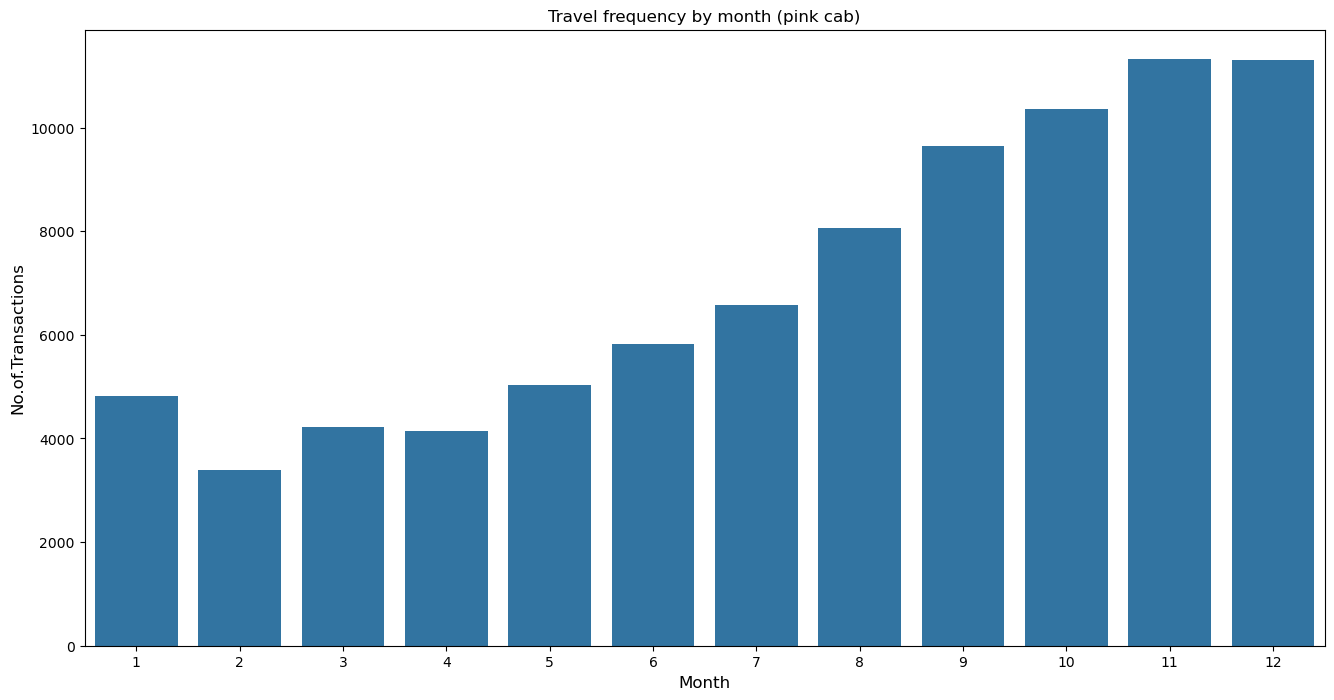

In [22]:
plt.figure(figsize=(16,8))
sns.barplot(x=plot0.index, y=plot0.values)
plt.title('Travel frequency by month (pink cab)',fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('No.of.Transactions', fontsize=12)
plt.show()

In [23]:
plot1=yellow_cab.groupby('Month')['Transaction_ID'].count()

In [24]:
plot1

Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction_ID, dtype: int64

Monthly transactional Analysis for Yellow cab

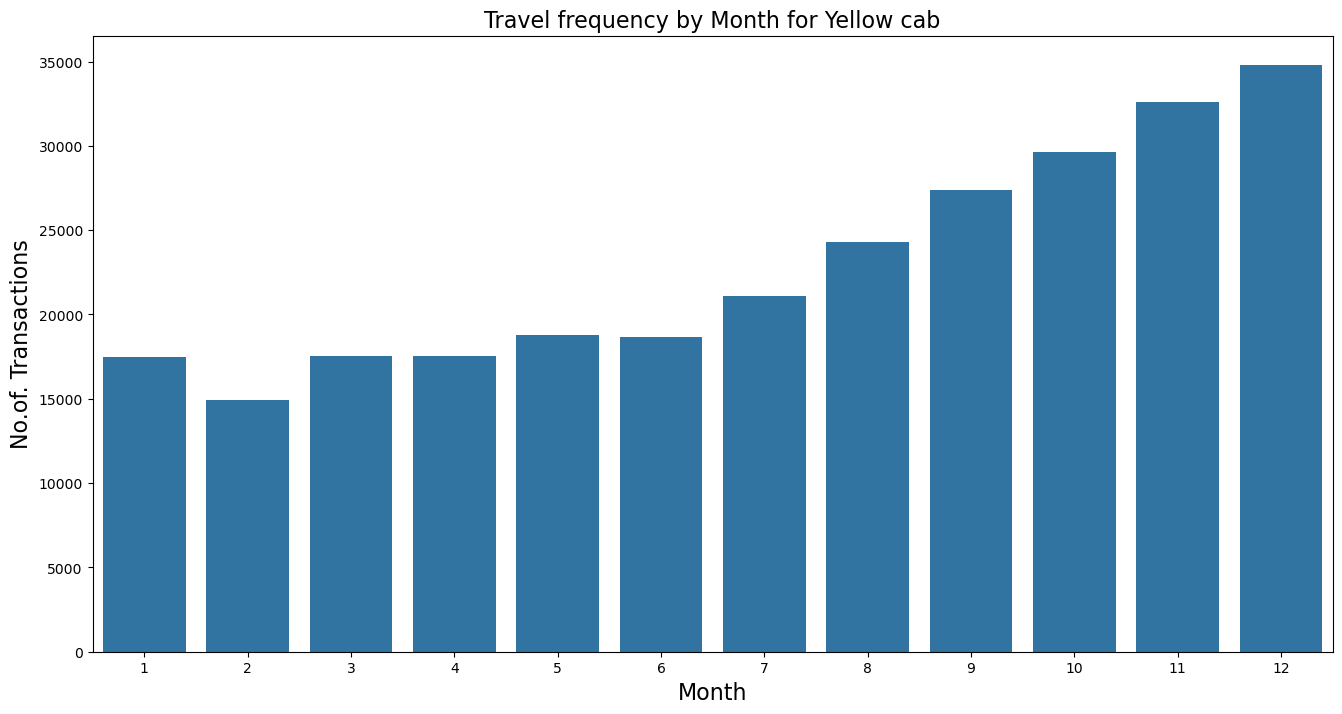

In [25]:
plt.figure(figsize=(16,8))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title('Travel frequency by Month for Yellow cab', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('No.of. Transactions', fontsize=16)
plt.show()

Yellow cab has higher travels(35000) in the month of december which is the holiday season compared to pink cab (12000)

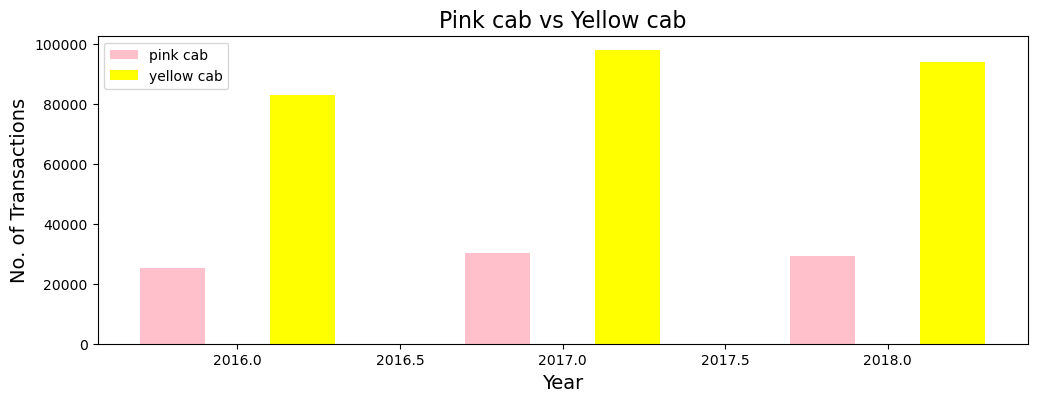

In [26]:
plot2=pink_cab.groupby('Year')['Transaction_ID'].count()
plot3=yellow_cab.groupby('Year')['Transaction_ID'].count()
plt.figure(figsize=(12,4))
ax=plt.subplot(111)
ax.bar(plot2.index-0.2, plot2.values, width=0.2, align='center', color='pink', label='pink cab')
ax.bar(plot3.index+0.2, plot3.values, width=0.2, align='center', color='yellow', label='yellow cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

It is clear from the above figure that number of transactions of yellow cab is much more higher than the pink cab on yearly basis

Analysing distance by splitting overall distance, pink cab and yellow cab distance

In [27]:
overall_distance=cab_df['KM_Travelled'].describe()
pink_cab_distance=pink_cab['KM_Travelled'].describe()
yellow_cab_distance=yellow_cab['KM_Travelled'].describe()

In [28]:
distance_df=pd.DataFrame({'overall':overall_distance.values,'pink_distance':pink_cab_distance.values,'yellow_distance':yellow_cab_distance.values}, index=['count','Mean','std.Dev','Min','25%','50%','75%','Max'])

distance_df

overall  pink_distance  yellow_distance
count    359392.000000   84711.000000    274681.000000
Mean         22.567254      22.559917        22.569517
std.Dev      12.233526      12.231092        12.234298
Min           1.900000       1.900000         1.900000
25%          12.000000      12.000000        11.990000
50%          22.440000      22.440000        22.440000
75%          32.960000      32.960000        32.960000
Max          48.000000      48.000000        48.000000

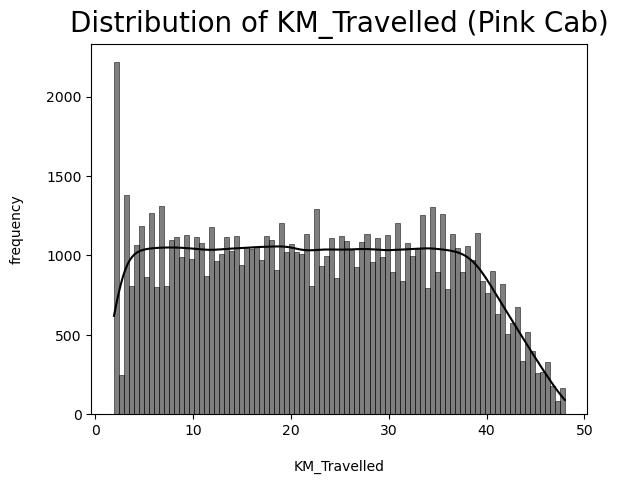

In [29]:
ax = sns.histplot(pink_cab['KM_Travelled'], kde=True, color='black', bins=90)
plt.title("Distribution of KM_Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM_Travelled", labelpad=16)
plt.ylabel("frequency", labelpad=16)
plt.show()

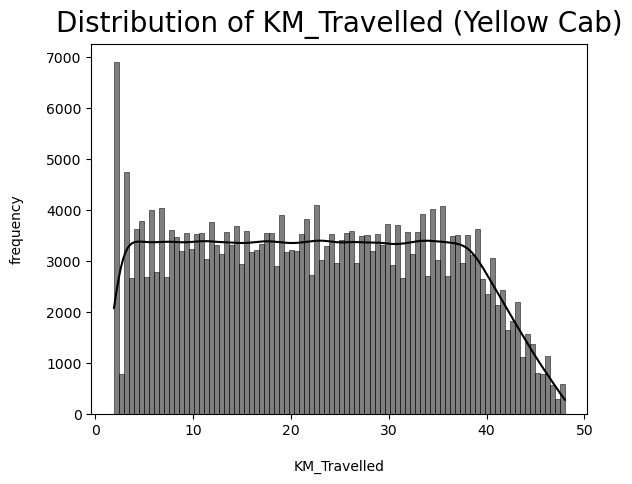

In [30]:
ax = sns.histplot(yellow_cab['KM_Travelled'], kde=True, color='black', bins=90)
plt.title("Distribution of KM_Travelled (Yellow Cab)", fontsize=20, y=1.012)
plt.xlabel("KM_Travelled", labelpad=16)
plt.ylabel("frequency", labelpad=16)
plt.show()

From the above graphs, we can see that most of the rides are in the range of approximately 2 to 48 KM.

Text(0.5, 1.0, 'Yellow cab')

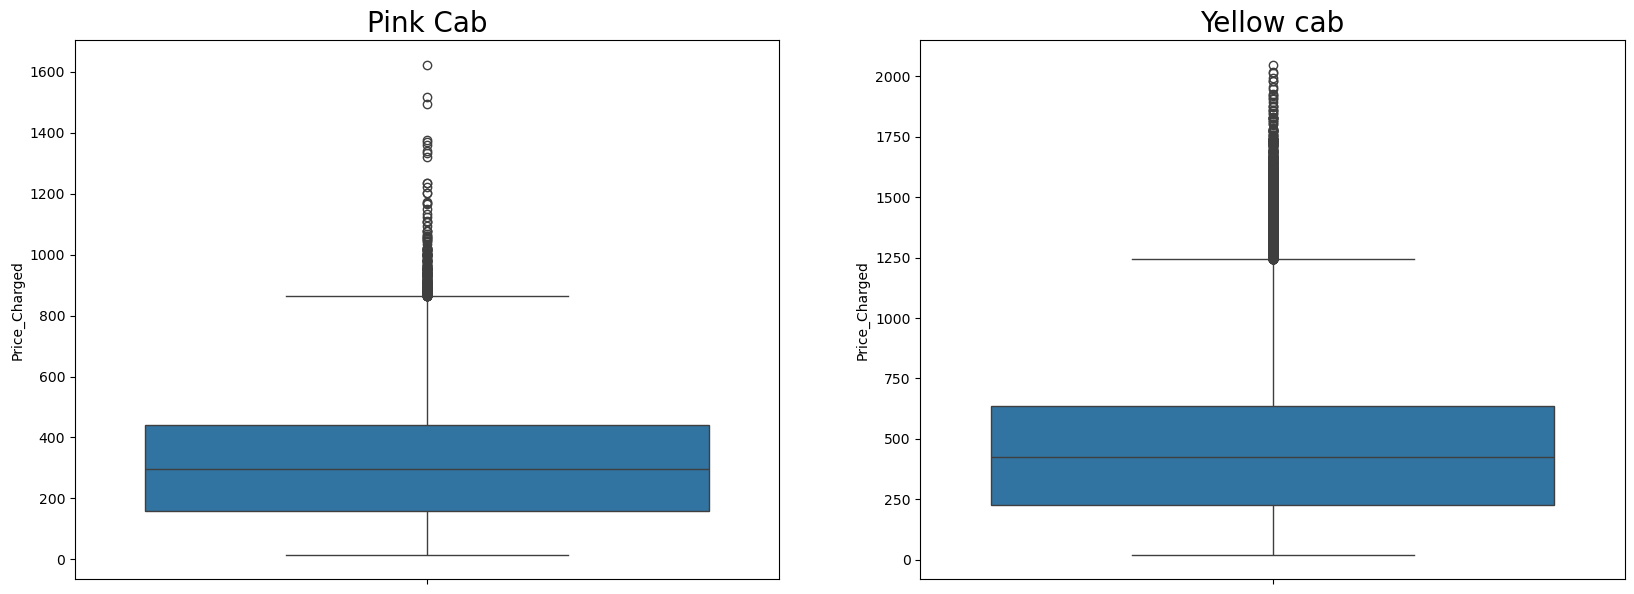

In [33]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(pink_cab['Price_Charged'], ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
sns.boxplot(yellow_cab['Price_Charged'], ax=ax2)
ax2.set_title('Yellow cab', fontsize=20)

Box plots are useful as they show outliers within a data set
An outlier is an observation that is numerically distant from the rest of the data.
When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot. This is right skewed.

These outliers are due to the use of higher end cars by the customers. Hence, there is no need to drop the variable(Price_Charged) from the dataset.

From the above figure, we conclude that the price charged for Yellow cab is more than Pink cab

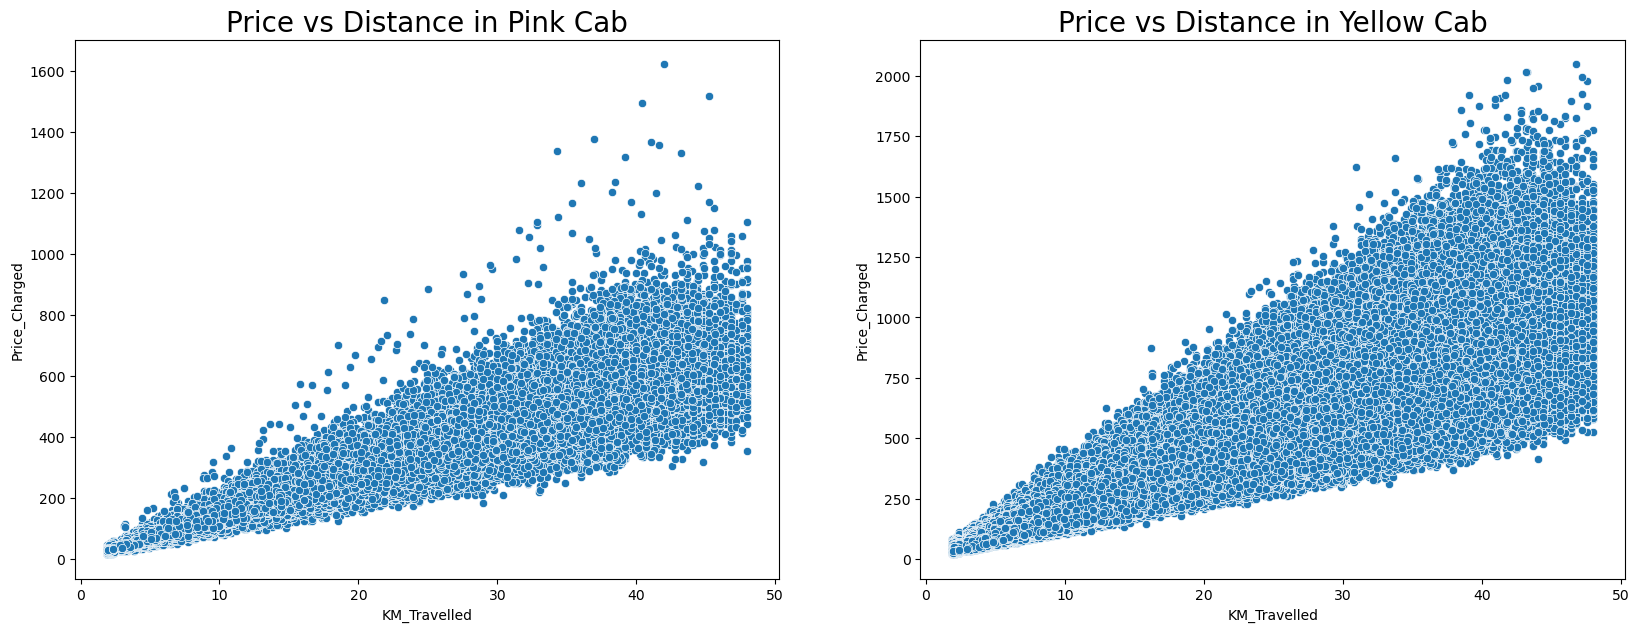

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.scatterplot(x=pink_cab['KM_Travelled'],y=pink_cab['Price_Charged'], ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
#ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(x=yellow_cab['KM_Travelled'],y=yellow_cab['Price_Charged'], ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
#ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15) # xtickbox should only be used together with 'FixedLocator'
plt.show()

In [39]:
pink_cab['KM_Travelled'].corr(pink_cab['Price_Charged'])

0.9277652782594857

In [40]:
yellow_cab['KM_Travelled'].corr(yellow_cab['Price_Charged'])

0.8597086294478461

Distance is one of the important factors, which drives the price of the rides.
We could see that there is a positive correlation in the graph for both Pink and Yellow cab.
The price for Yellow cab is higher compared to Pink cab.

Analysing pink cab

In [45]:
# Finding mean value of price charged in every year for pink cab

plot4=pink_cab.groupby('Year').Price_Charged.mean()
plot4

Year
2016    315.850071
2017    315.535059
2018    301.538134
Name: Price_Charged, dtype: float64

In [47]:
# Finding mean value of cost of trip in every year for yellow cab

plot5=pink_cab.groupby('Year').Cost_of_Trip.mean()
plot5

Year
2016    247.039209
2017    248.820917
2018    248.413839
Name: Cost_of_Trip, dtype: float64

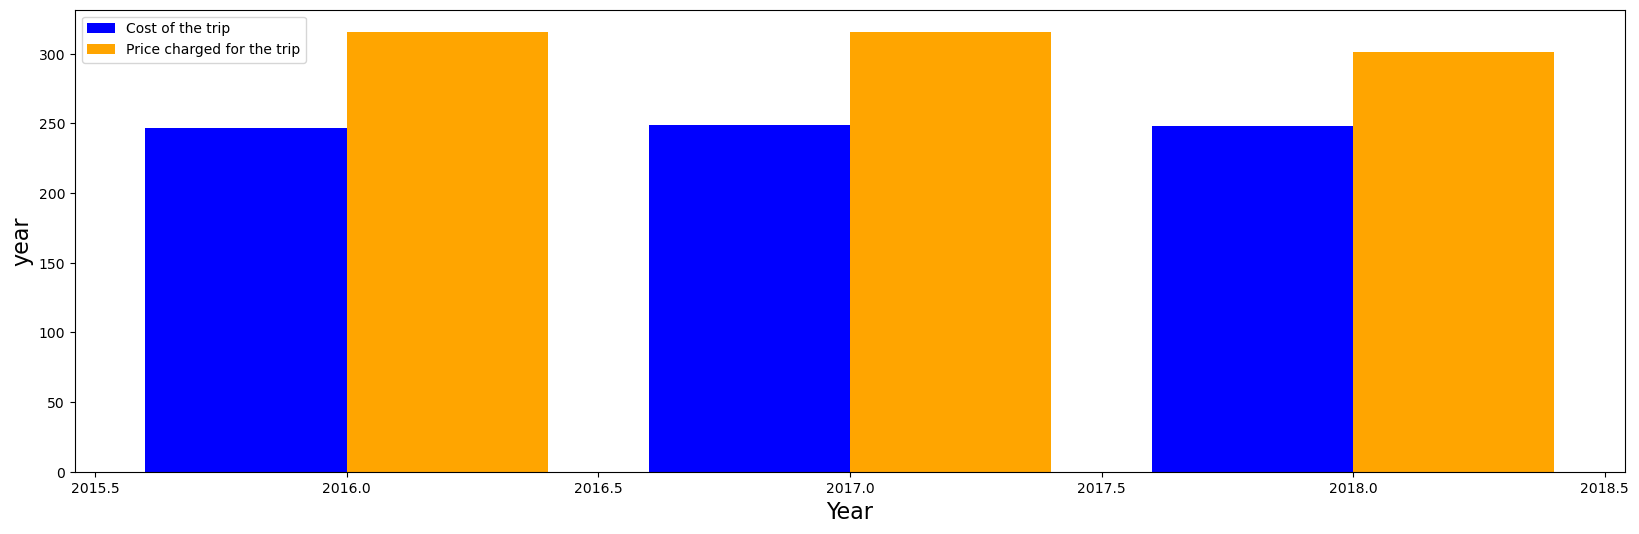

In [49]:
plot6=pink_cab.groupby('Year').Transaction_ID.count()
plt.figure(figsize=(20,6))
ax=plt.subplot(111)
ax.bar(plot6.index-0.2,plot5.values, width=0.4,align='center',color='blue', label='Cost of the trip')
ax.bar(plot6.index+0.2,plot4.values, width=0.4,align='center',color='Orange', label='Price charged for the trip')
plt.xlabel('Year',fontsize=16)
plt.ylabel('year', fontsize=16)
plt.legend()
plt.show()

Analyses for Yellow cab

In [50]:
plot7=yellow_cab.groupby('Year').Price_Charged.mean()
plot7

Year
2016    468.230462
2017    466.278438
2018    440.893159
Name: Price_Charged, dtype: float64

In [51]:
plot8=yellow_cab.groupby('Year').Cost_of_Trip.mean()
plot8

Year
2016    298.536761
2017    297.861544
2018    297.442400
Name: Cost_of_Trip, dtype: float64

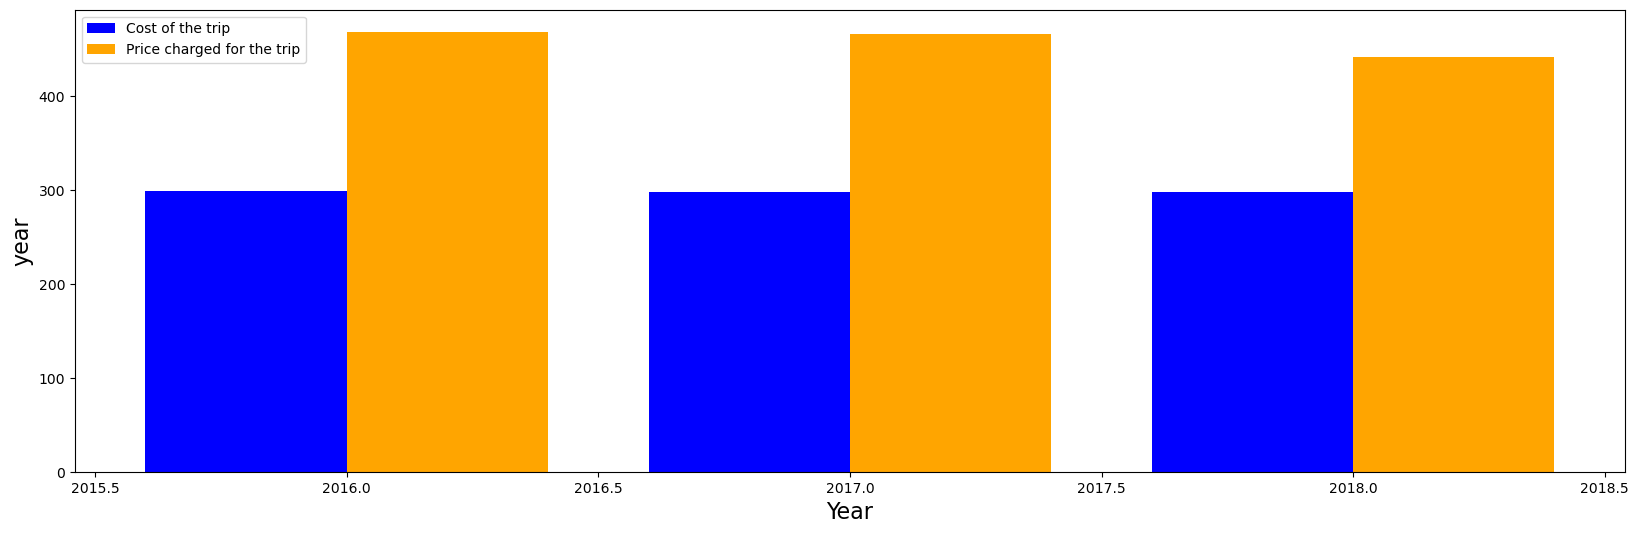

In [52]:
plot9=yellow_cab.groupby('Year').Transaction_ID.count()
plt.figure(figsize=(20,6))
ax=plt.subplot(111)
ax.bar(plot9.index-0.2,plot8.values, width=0.4,align='center',color='blue', label='Cost of the trip')
ax.bar(plot9.index+0.2,plot7.values, width=0.4,align='center',color='Orange', label='Price charged for the trip')
plt.xlabel('Year',fontsize=16)
plt.ylabel('year', fontsize=16)
plt.legend()
plt.show()

The Yellow cab has a higher Profit Margin (Price Charged - Cost of Trip) compared to Pink cab

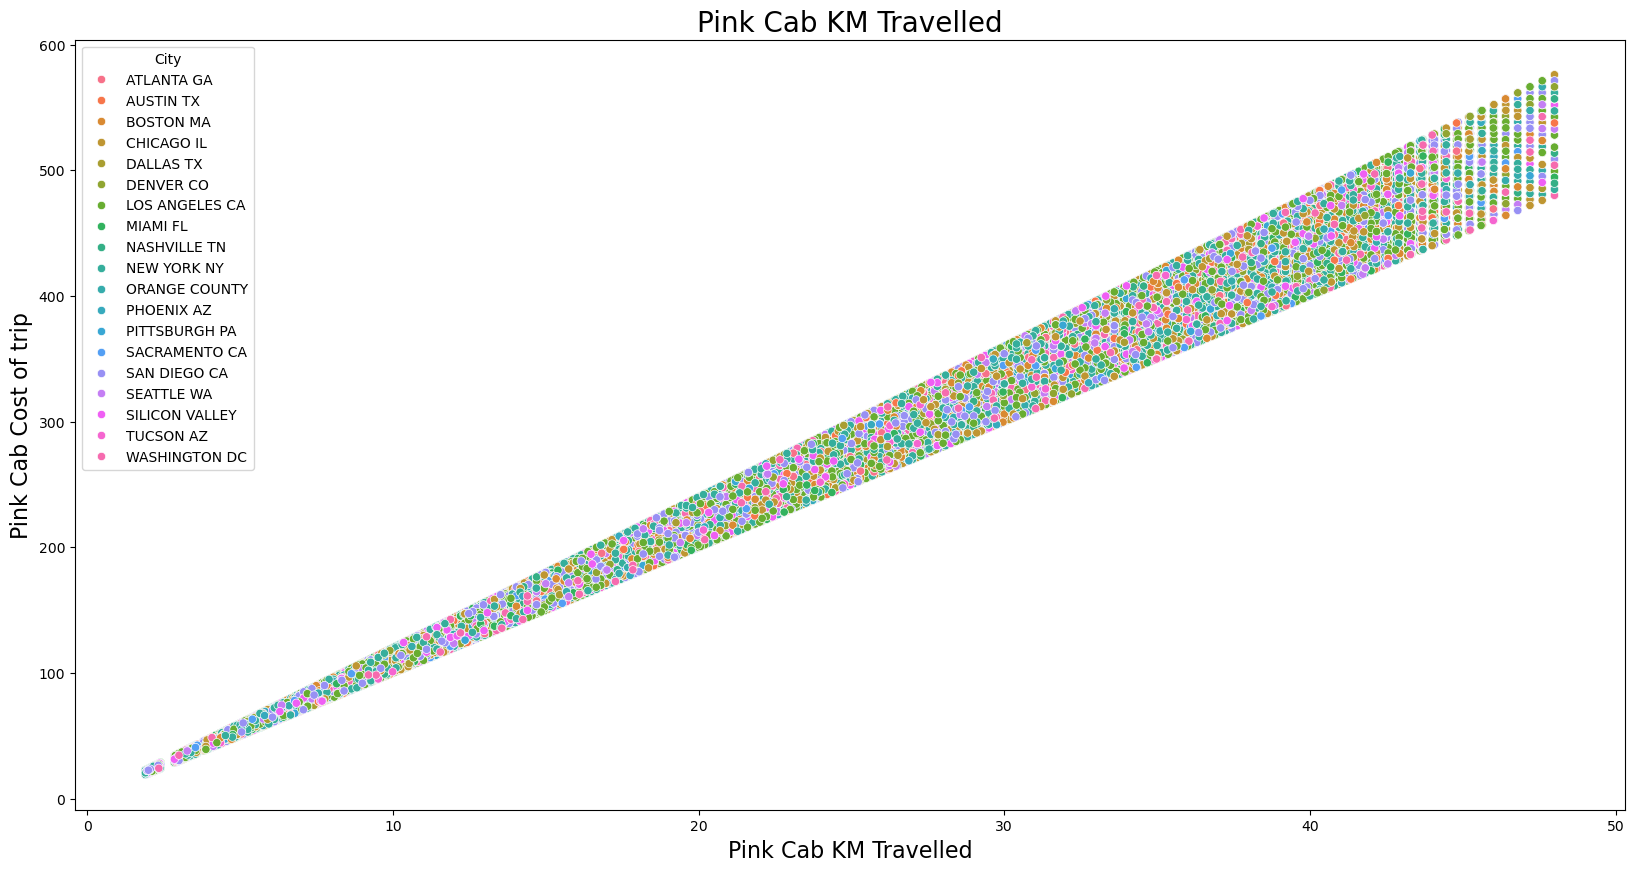

In [54]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=pink_cab, x=pink_cab.KM_Travelled, y=pink_cab.Cost_of_Trip, hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Cost of trip',fontsize = 16)
plt.xlabel('Pink Cab KM Travelled',fontsize = 16)
plt.show()

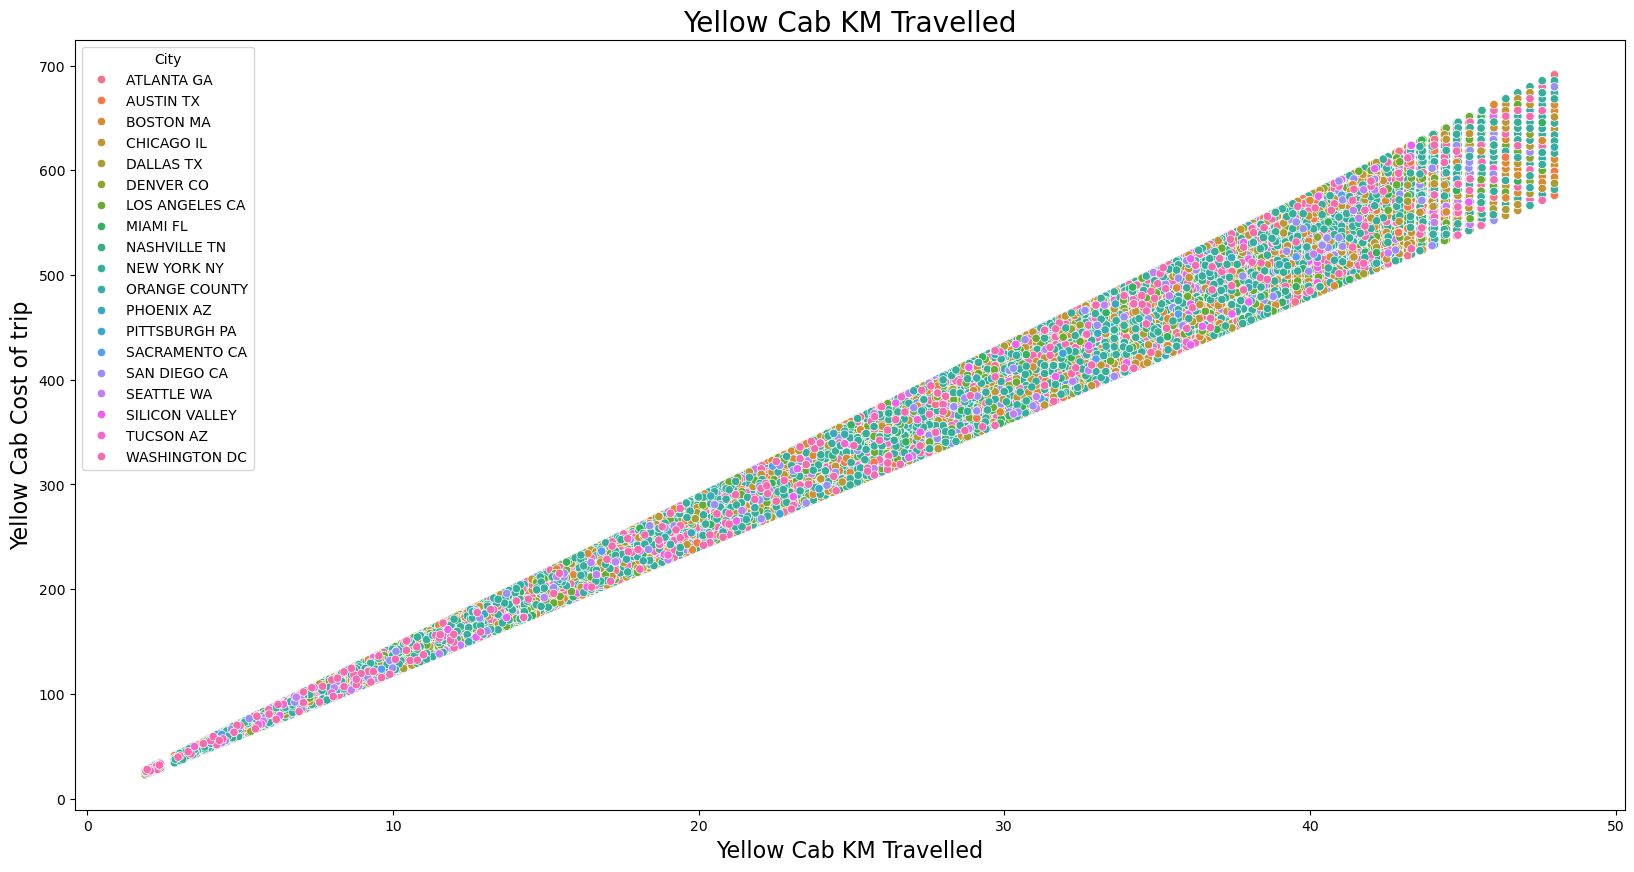

In [55]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=yellow_cab, x=yellow_cab.KM_Travelled, y=yellow_cab.Cost_of_Trip, hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Cost of trip',fontsize = 16)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 16)
plt.show()

From the graph we see that the cost of trip for both Pink and Yellow cab are almost the same.

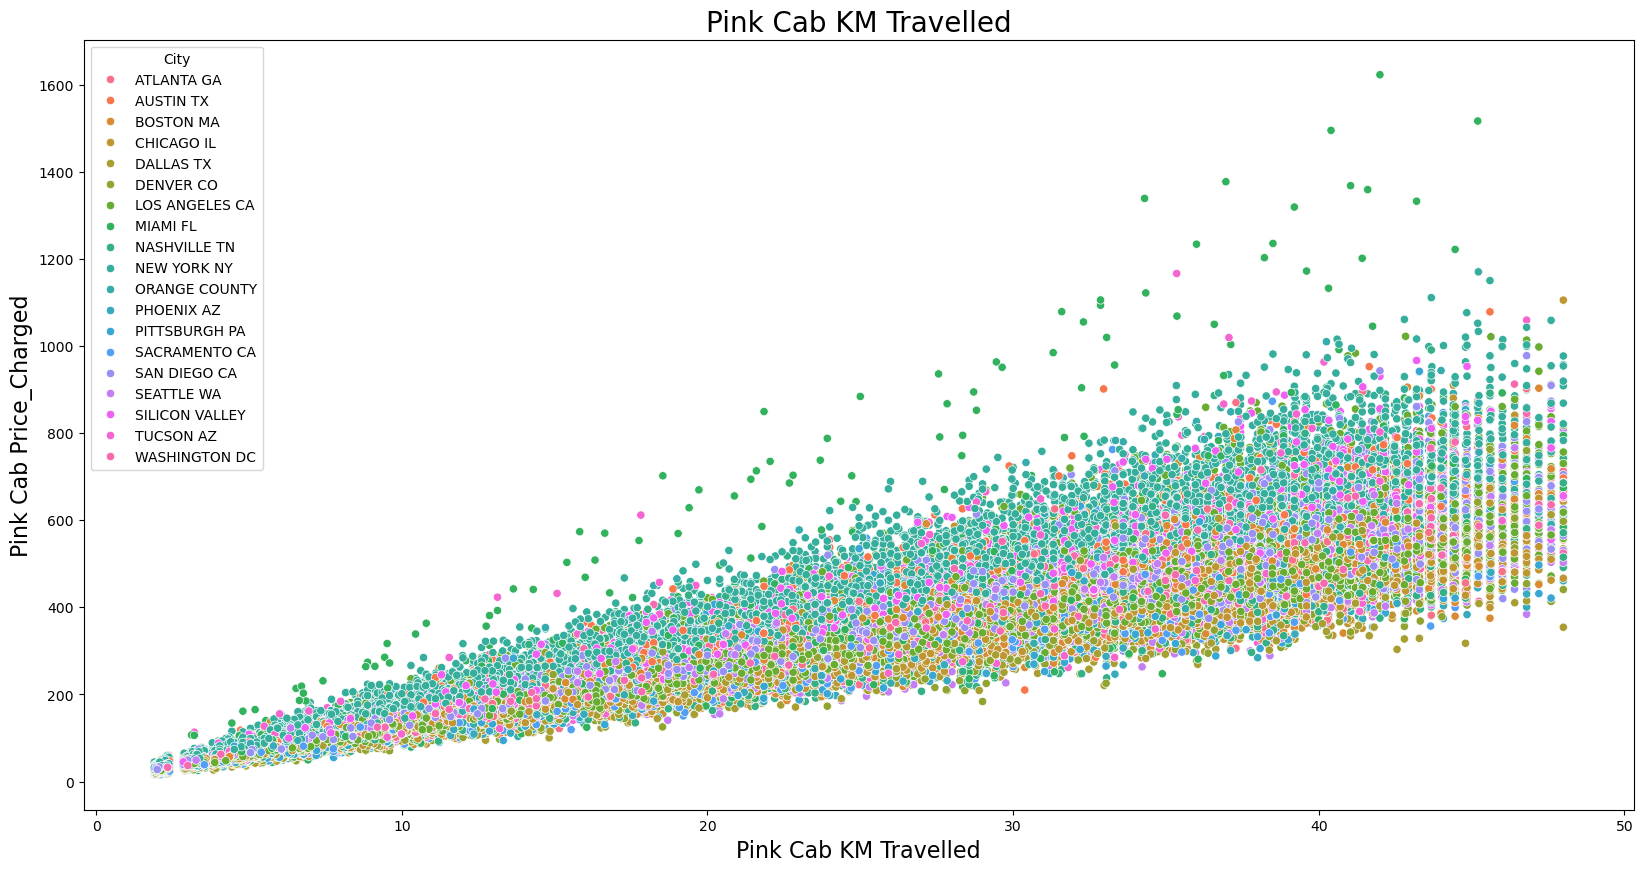

In [56]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=pink_cab, x=pink_cab.KM_Travelled, y=pink_cab.Price_Charged, hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Price_Charged',fontsize = 16)
plt.xlabel('Pink Cab KM Travelled',fontsize = 16)
plt.show()

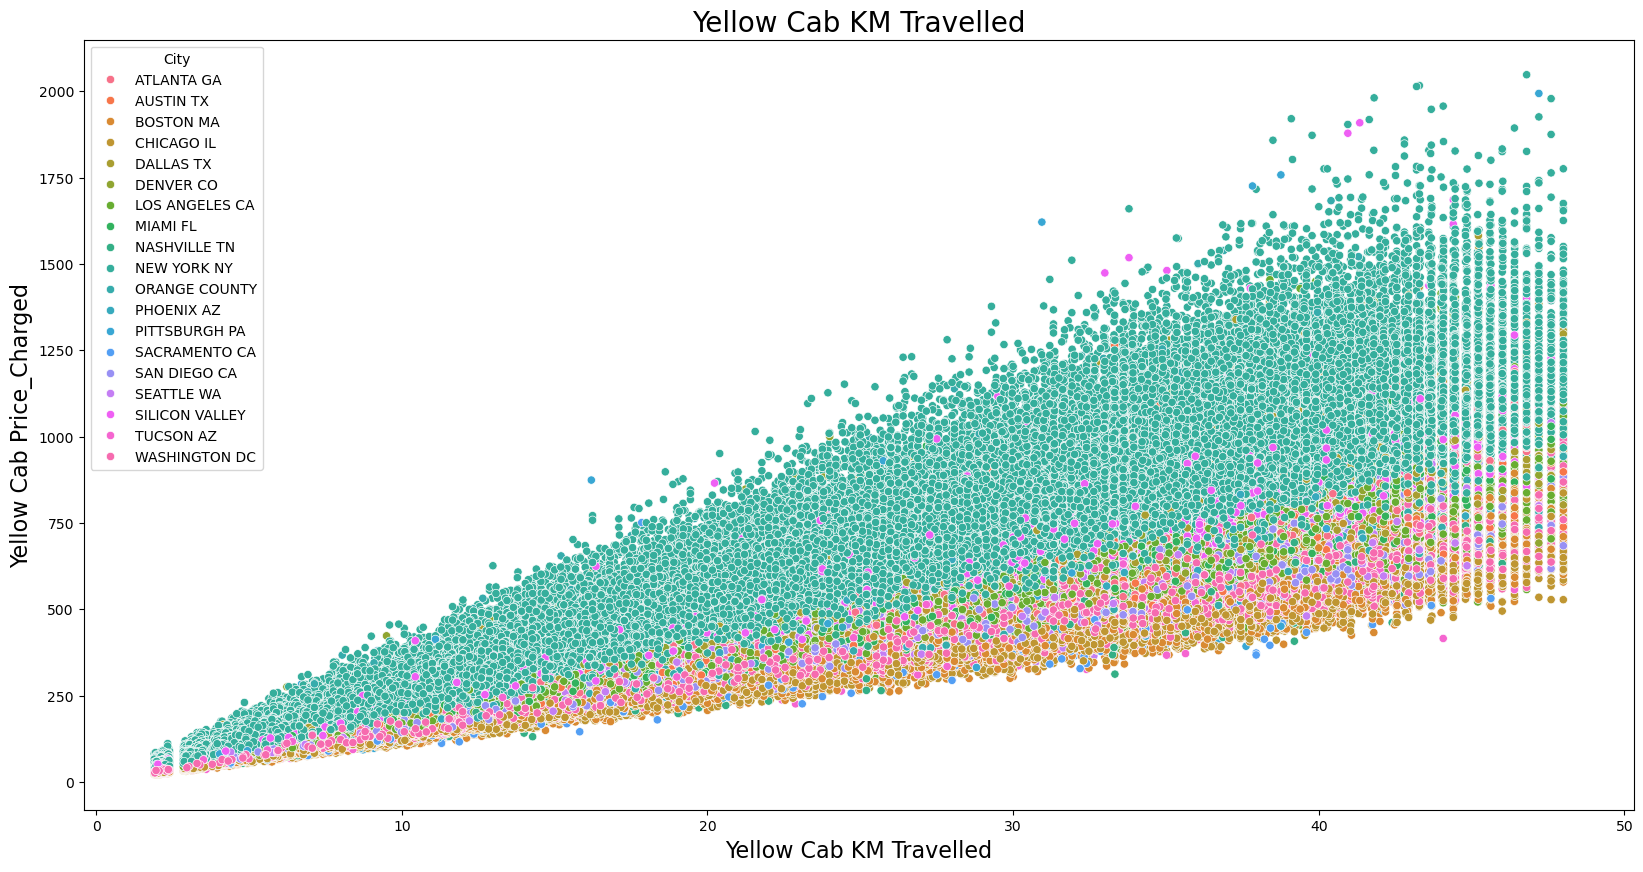

In [57]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=yellow_cab, x=yellow_cab.KM_Travelled, y=yellow_cab.Price_Charged, hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Price_Charged',fontsize = 16)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 16)
plt.show()

From the graphs we see that for New York City the Yellow Cab price charged is more in comparison to the other cities.
and for Pink cab all the cities have the same increase in prices with increase in distance
the outliers exist in both the graphs which may be due to high end cars or weather.

Creating Master Data

In [74]:
left = cab_df.set_index(['Transaction_ID'])
right = transaction_df.set_index(['Transaction_ID'])
major_data = left.join(right)
major_data.head()

Company        City  KM_Travelled  Price_Charged  \
Transaction_ID                                                      
10000011        Pink Cab  ATLANTA GA         30.45         370.95   
10000012        Pink Cab  ATLANTA GA         28.62         358.52   
10000013        Pink Cab  ATLANTA GA          9.04         125.20   
10000014        Pink Cab  ATLANTA GA         33.17         377.40   
10000015        Pink Cab  ATLANTA GA          8.73         114.62   

                Cost_of_Trip  Month  Year  Customer_ID Payment_Mode  
Transaction_ID                                                       
10000011             313.635      1  2016        29290         Card  
10000012             334.854      1  2016        27703         Card  
10000013              97.632      1  2016        28712         Cash  
10000014             351.602      1  2016        28020         Cash  
10000015              97.776      1  2016        27182         Card

In [75]:
left = major_data.set_index([major_data.index,'Customer_ID'])
right = customer_df.set_index(['Customer_ID'])
major_data = left.join(right)
major_data.head()

Company        City  KM_Travelled  Price_Charged  \
Transaction_ID Customer_ID                                                      
10000011       29290        Pink Cab  ATLANTA GA         30.45         370.95   
10000012       27703        Pink Cab  ATLANTA GA         28.62         358.52   
10000013       28712        Pink Cab  ATLANTA GA          9.04         125.20   
10000014       28020        Pink Cab  ATLANTA GA         33.17         377.40   
10000015       27182        Pink Cab  ATLANTA GA          8.73         114.62   

                            Cost_of_Trip  Month  Year Payment_Mode Gender  \
Transaction_ID Customer_ID                                                  
10000011       29290             313.635      1  2016         Card   Male   
10000012       27703             334.854      1  2016         Card   Male   
10000013       28712              97.632      1  2016         Cash   Male   
10000014       28020             351.602      1  2016         Cash   Male   
10000015       27182              97.776      1  2016         Card   Male   

                            Age  Income_(USD/Month)  
Transaction_ID Customer_ID                           
10000011       29290         28               10813  
10000012       27703         27                9237  
10000013       28712         53               11242  
10000014       28020         23               23327  
10000015       27182         33                8536

In [76]:
left = major_data.set_index([major_data.index,'City'])
right = city_df.set_index(['City'])
major_data = left.join(right)
major_data.head()

Company  KM_Travelled  Price_Charged  \
Transaction_ID Customer_ID City                                                
10000011       29290       ATLANTA GA  Pink Cab         30.45         370.95   
10000012       27703       ATLANTA GA  Pink Cab         28.62         358.52   
10000013       28712       ATLANTA GA  Pink Cab          9.04         125.20   
10000014       28020       ATLANTA GA  Pink Cab         33.17         377.40   
10000015       27182       ATLANTA GA  Pink Cab          8.73         114.62   

                                       Cost_of_Trip  Month  Year Payment_Mode  \
Transaction_ID Customer_ID City                                                 
10000011       29290       ATLANTA GA       313.635      1  2016         Card   
10000012       27703       ATLANTA GA       334.854      1  2016         Card   
10000013       28712       ATLANTA GA        97.632      1  2016         Cash   
10000014       28020       ATLANTA GA       351.602      1  2016         Cash   
10000015       27182       ATLANTA GA        97.776      1  2016         Card   

                                      Gender  Age  Income_(USD/Month)  \
Transaction_ID Customer_ID City                                         
10000011       29290       ATLANTA GA   Male   28               10813   
10000012       27703       ATLANTA GA   Male   27                9237   
10000013       28712       ATLANTA GA   Male   53               11242   
10000014       28020       ATLANTA GA   Male   23               23327   
10000015       27182       ATLANTA GA   Male   33                8536   

                                      Population     Users  
Transaction_ID Customer_ID City                             
10000011       29290       ATLANTA GA   814,885    24,701   
10000012       27703       ATLANTA GA   814,885    24,701   
10000013       28712       ATLANTA GA   814,885    24,701   
10000014       28020       ATLANTA GA   814,885    24,701   
10000015       27182       ATLANTA GA   814,885    24,701

In [77]:
major_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 359392 entries, (10000011, 29290, 'ATLANTA GA') to (10440107, 52917, 'WASHINGTON DC')
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Company             359392 non-null  object 
 1   KM_Travelled        359392 non-null  float64
 2   Price_Charged       359392 non-null  float64
 3   Cost_of_Trip        359392 non-null  float64
 4   Month               359392 non-null  int64  
 5   Year                359392 non-null  int64  
 6   Payment_Mode        359392 non-null  object 
 7   Gender              359392 non-null  object 
 8   Age                 359392 non-null  int64  
 9   Income_(USD/Month)  359392 non-null  int64  
 10  Population          359392 non-null  object 
 11  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 48.2+ MB


In [78]:
# renaming Income_(USD/Month) column as Income for better readability
major_data=major_data.reset_index()
major_data=major_data.rename(columns={'Income_(USD/Month)':'Income'})


In [81]:
city_users=major_data.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

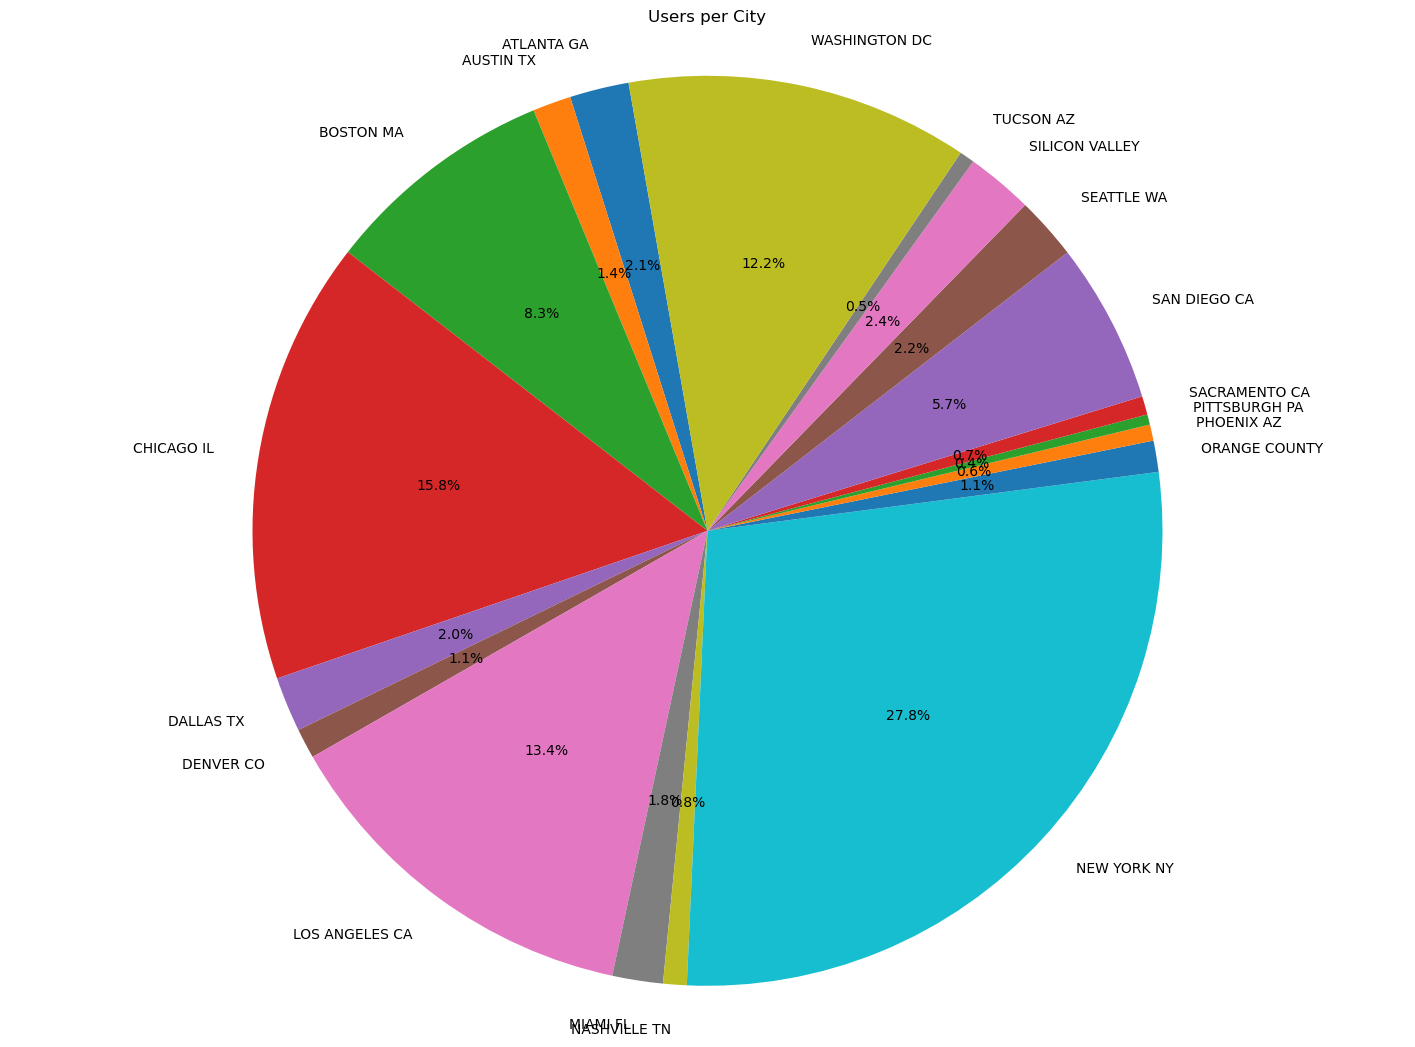

In [92]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=False, startangle=100,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

New York City has the highest Cab users with 27.8% followed by Chicago with 15.8% and Los Angeles with 13.4%

In [82]:
city_y = major_data[major_data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_y

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

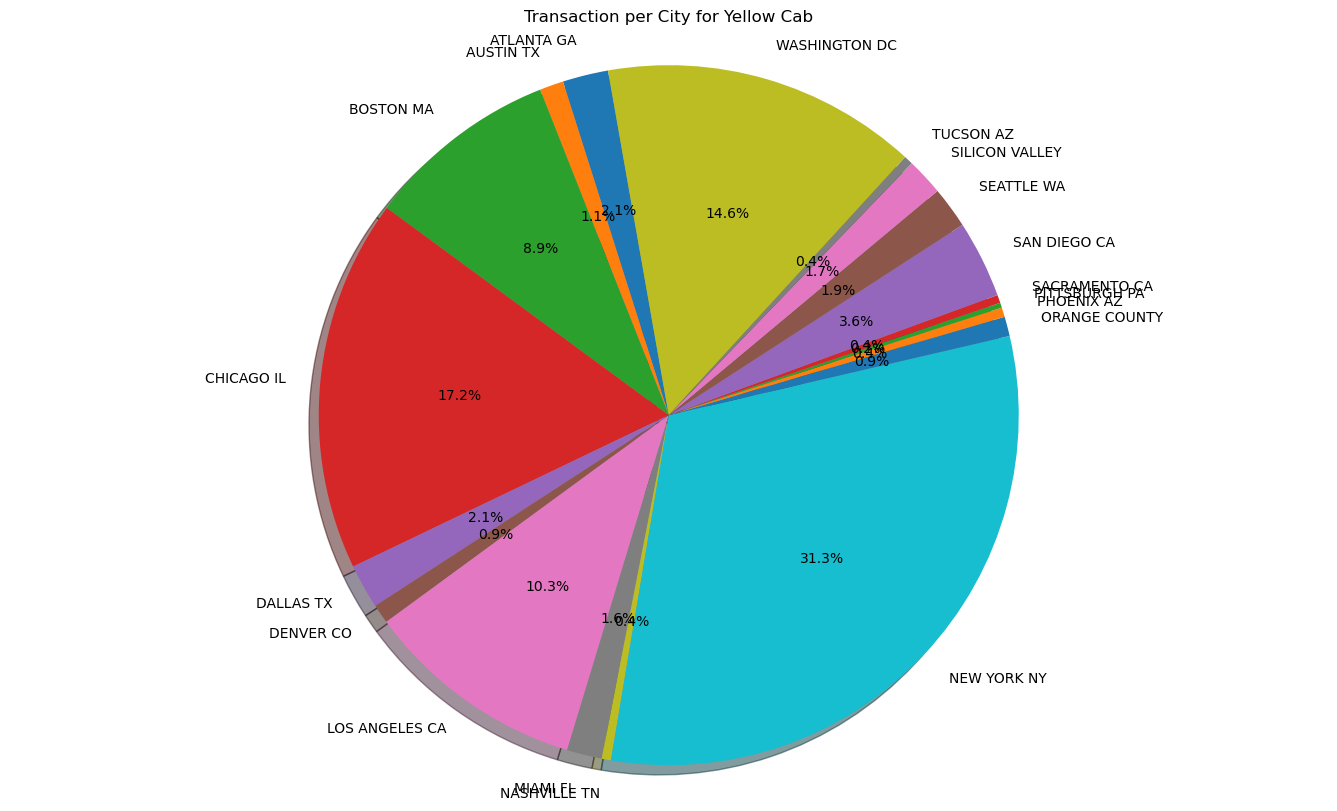

In [89]:
labs = city_y.index
vals = city_y.values
figp, axp = plt.subplots(figsize=(17,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=100,)
axp.axis('equal')

plt.title('Transaction per City for Yellow Cab')
plt.show()

In [90]:
city_p = major_data[major_data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_p

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

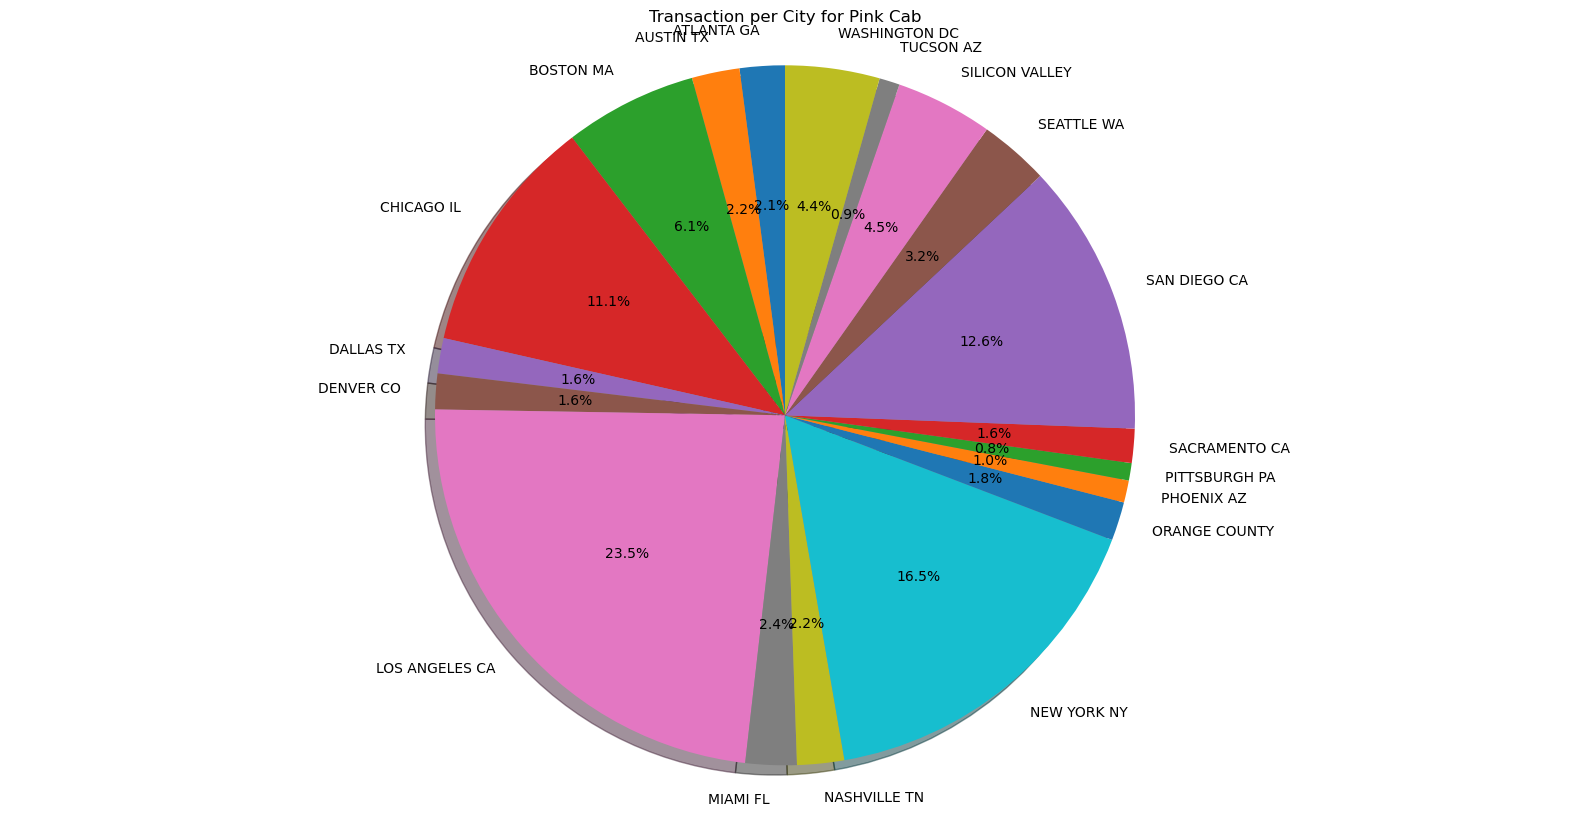

In [91]:
labs = city_p.index
vals = city_p.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

Transaction for Yellow Cab is highest in New York City which has the highest Cab Users of 31%. Transaction for Pink Cab is highest in Los Angeles City

In [93]:
gender_y=major_data[major_data.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
gender_y

Gender
Female    454.571538
Male      460.821326
Name: Price_Charged, dtype: float64

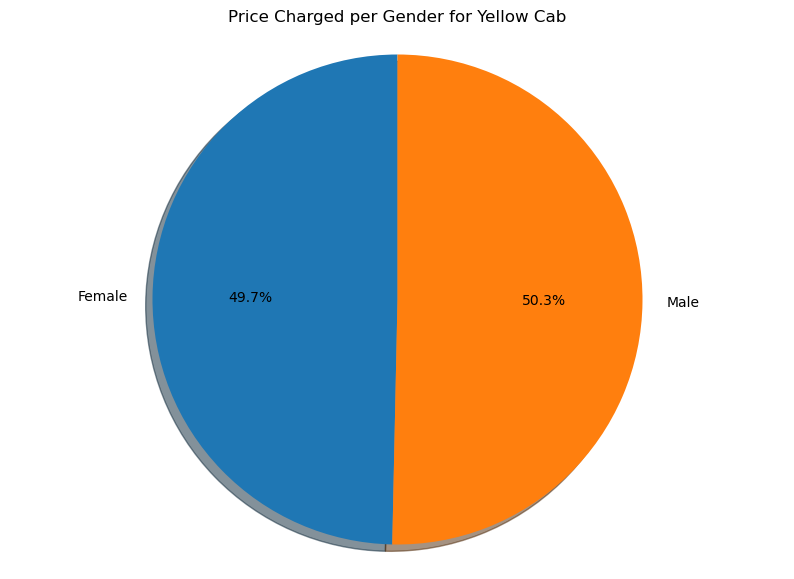

In [94]:
labs = gender_y.index
vals = gender_y.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Yellow Cab')
plt.show()

In [96]:
gender_p=major_data[major_data.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()
gender_p

Gender
Female    310.624823
Male      310.940547
Name: Price_Charged, dtype: float64

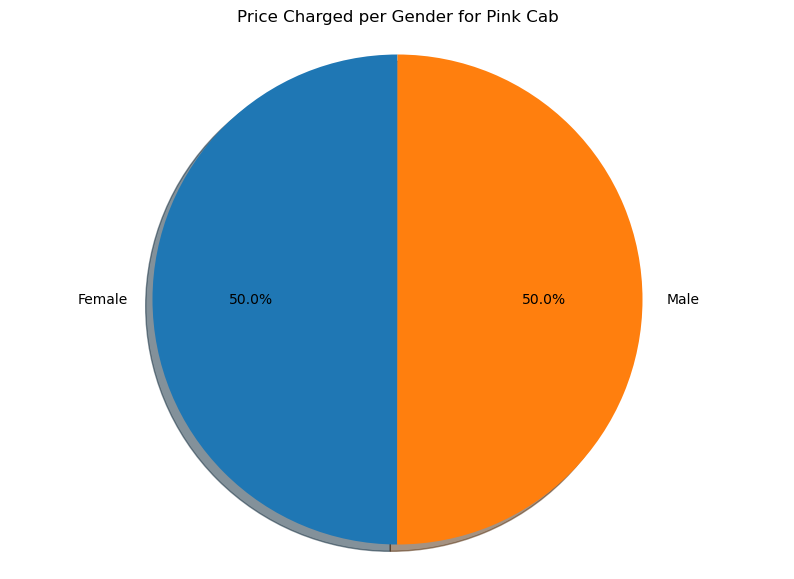

In [98]:
labs = gender_p.index
vals = gender_p.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Pink Cab')
plt.show()

Yellow Cab charge less from Female Customers whereas Pink Cab charges same for both Male and Female Customers.

In [99]:
gender_cab=major_data.groupby(['Company','Gender']).Customer_ID.nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

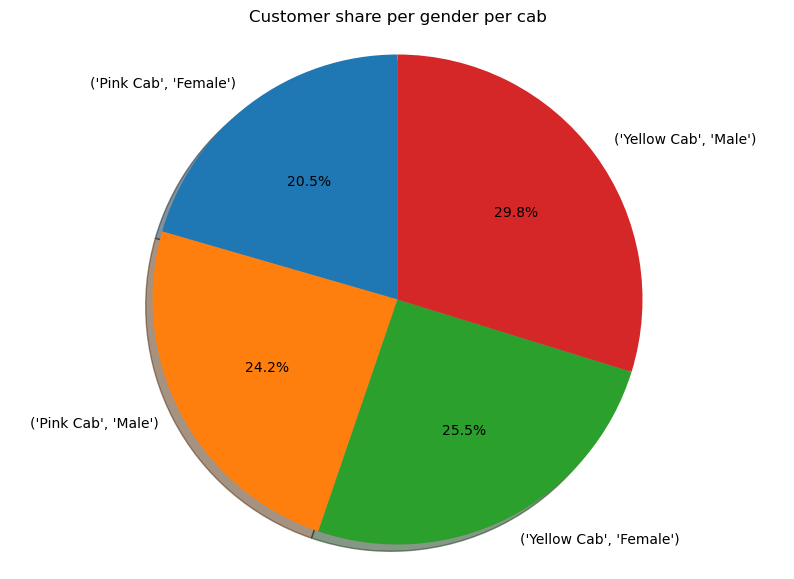

In [100]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()


Female Customers in Yellow Cab is higher compared to female customers in pink cab

In [101]:
major_data['Margins'] = (major_data['Price_Charged']-major_data['Cost_of_Trip'])
major_data.head()

Transaction_ID  Customer_ID        City   Company  KM_Travelled  \
0        10000011        29290  ATLANTA GA  Pink Cab         30.45   
1        10000012        27703  ATLANTA GA  Pink Cab         28.62   
2        10000013        28712  ATLANTA GA  Pink Cab          9.04   
3        10000014        28020  ATLANTA GA  Pink Cab         33.17   
4        10000015        27182  ATLANTA GA  Pink Cab          8.73   

   Price_Charged  Cost_of_Trip  Month  Year Payment_Mode Gender  Age  Income  \
0         370.95       313.635      1  2016         Card   Male   28   10813   
1         358.52       334.854      1  2016         Card   Male   27    9237   
2         125.20        97.632      1  2016         Cash   Male   53   11242   
3         377.40       351.602      1  2016         Cash   Male   23   23327   
4         114.62        97.776      1  2016         Card   Male   33    8536   

  Population     Users  Margins  
0   814,885    24,701    57.315  
1   814,885    24,701    23.666  
2   814,885    24,701    27.568  
3   814,885    24,701    25.798  
4   814,885    24,701    16.844

In [102]:
df = major_data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Margins']]
df.corr()

KM_Travelled  Price_Charged  Cost_of_Trip     Month      Year  \
KM_Travelled       1.000000       0.835753      0.981848 -0.001773 -0.001094   
Price_Charged      0.835753       1.000000      0.859812 -0.059639 -0.036903   
Cost_of_Trip       0.981848       0.859812      1.000000 -0.008309 -0.001766   
Month             -0.001773      -0.059639     -0.008309  1.000000 -0.033169   
Year              -0.001094      -0.036903     -0.001766 -0.033169  1.000000   
Age               -0.000369      -0.003084     -0.000189 -0.002376 -0.000497   
Income            -0.000544       0.003228     -0.000633  0.000585 -0.001679   
Margins            0.462768       0.864154      0.486056 -0.093886 -0.061420   

                    Age    Income   Margins  
KM_Travelled  -0.000369 -0.000544  0.462768  
Price_Charged -0.003084  0.003228  0.864154  
Cost_of_Trip  -0.000189 -0.000633  0.486056  
Month         -0.002376  0.000585 -0.093886  
Year          -0.000497 -0.001679 -0.061420  
Age            1.000000  0.003907 -0.005093  
Income         0.003907  1.000000  0.006148  
Margins       -0.005093  0.006148  1.000000

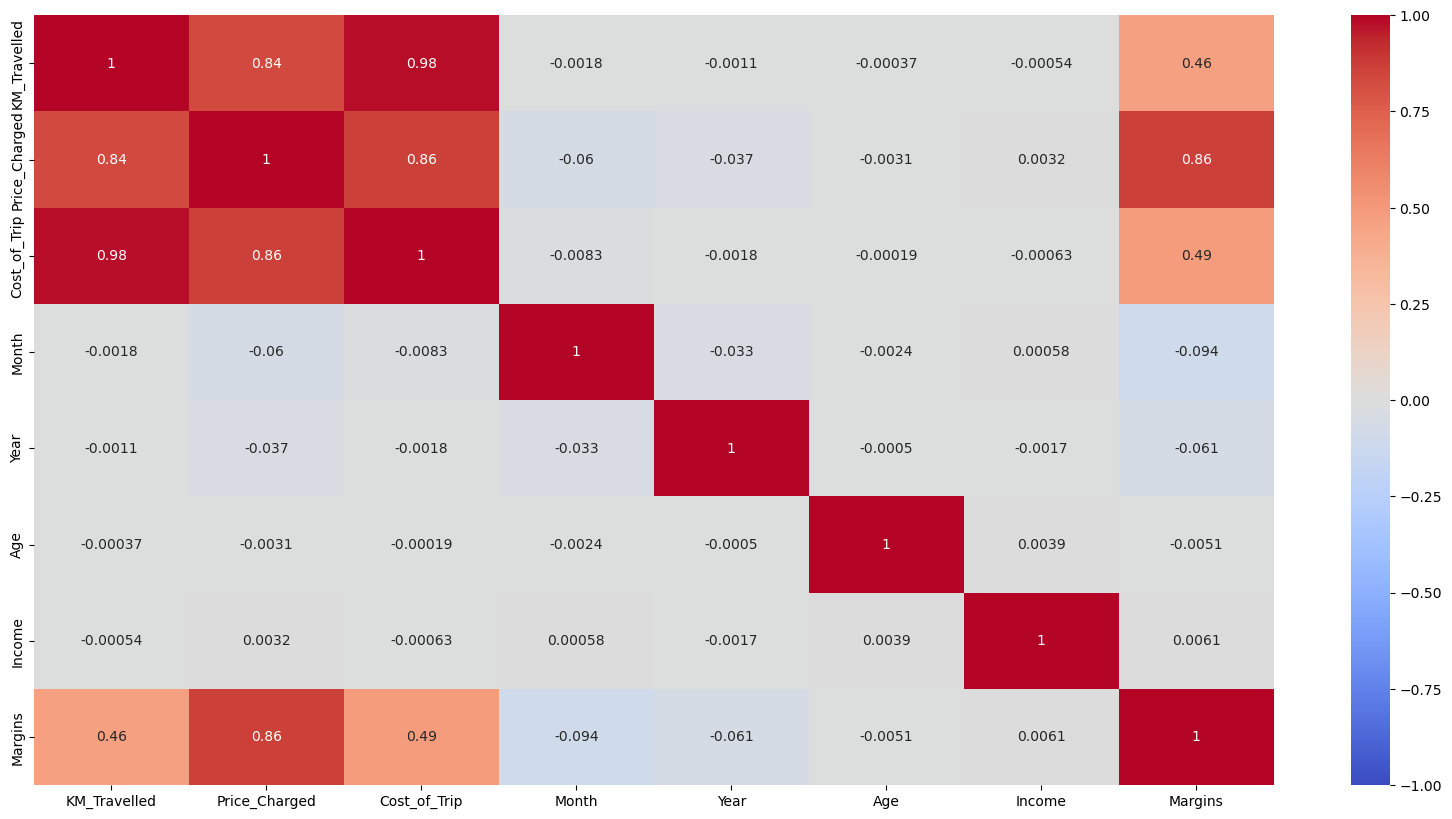

In [103]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

There is a correlation between Margin & Price_Charged

In [104]:
city_m = major_data[major_data.Month==12].groupby('City').Margins.mean()
city_m

City
ATLANTA GA         96.252930
AUSTIN TX          91.891400
BOSTON MA          62.360750
CHICAGO IL         52.396687
DALLAS TX         109.465216
DENVER CO         111.138893
LOS ANGELES CA     81.752667
MIAMI FL          100.150911
NASHVILLE TN       81.459593
NEW YORK NY       258.421581
ORANGE COUNTY      76.134553
PHOENIX AZ         76.922806
PITTSBURGH PA      57.105846
SACRAMENTO CA      27.119039
SAN DIEGO CA       70.382592
SEATTLE WA         76.515311
SILICON VALLEY    167.087114
TUCSON AZ          84.105100
WASHINGTON DC      62.742899
Name: Margins, dtype: float64

In [105]:
dt1 = major_data[(major_data.Company=='Pink Cab')&(major_data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dt2 = major_data[(major_data.Company=='Yellow Cab')&(major_data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dd1 = pd.DataFrame({'Margins_pink':dt1.values,'Transactions_pink':major_data[major_data.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})
dd2 = pd.DataFrame({'Margins_yellow':dt2.values,'Transactions_yellow':major_data[major_data.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

Monthly Margins of Pink Cab

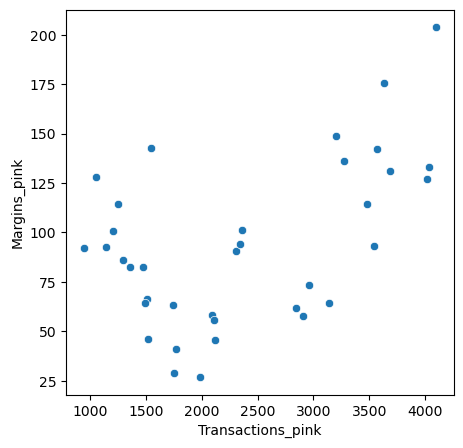

In [106]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd1.Transactions_pink,y=dd1.Margins_pink)
plt.show()

Pink Cabs increase their margins with increase in number of Transactions

Margins for Yellow cabs

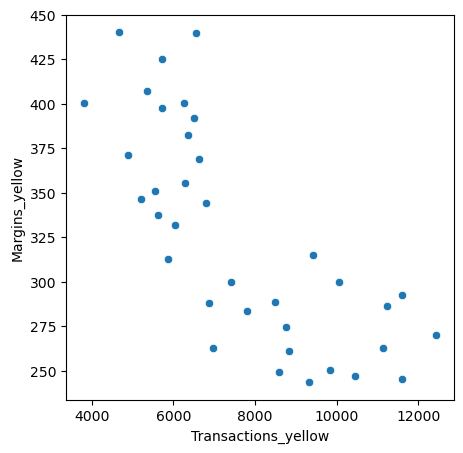

In [107]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd2.Transactions_yellow,y=dd2.Margins_yellow)
plt.show()

Yellow Cab decrease the Margin with the increase in Transaction

Hypothesis Testing

Null Hypothesis:Margin remain the same regarding Gender for both Yellow Cab & Pink Cab

In [108]:
a = major_data[(major_data.Gender=='Female')&(major_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = major_data[(major_data.Gender=='Male')&(major_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494056e-25


Yellow Cab: There is difference in Margin between Male and Female customers

For Pink Cabs

In [109]:
a = major_data[(major_data.Gender=='Female')&(major_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = major_data[(major_data.Gender=='Male')&(major_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no difference
P value is  0.115153059004258


Pink Cab: There is no difference in Margin between Male and Female customers

In [110]:
#Margins per Age
major_data[major_data.Age<=50].groupby('Company').Margins.mean()
major_data[major_data.Age>50].groupby('Company').Margins.mean()

Company
Pink Cab       62.053044
Yellow Cab    155.855885
Name: Margins, dtype: float64

In [111]:
#Pink Cab
a = major_data[(major_data.Age<=50)&(major_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = major_data[(major_data.Age>50)&(major_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

71228 13483
We accept null hypothesis that theres no difference
P value is  0.32817487547980695


In [112]:
#Yellow Cab
a = major_data[(major_data.Age<=50)&(major_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = major_data[(major_data.Age>50)&(major_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis')
    
print('P value is ', p_value)

231480 43201
We accept alternate hypothesis that theres a difference
P value is  6.4942568177993685e-09


Yellow Cabs also gives discount to people older than 50.



Is there difference in margins for Card payer and Cash payers

In [113]:
#Pink Cab
a = major_data[(major_data.Payment_Mode=='Cash')&(major_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = major_data[(major_data.Payment_Mode=='Card')&(major_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

We accept null hypothesis that theres no difference
P value is  0.7900465828793286


In [114]:
#Yellow Cab
a = major_data[(major_data.Payment_Mode=='Cash')&(major_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = major_data[(major_data.Payment_Mode=='Card')&(major_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.29330606382987284


There is no difference in Margin regarding mode of Payment for both Yellow & Pink Cab

In [115]:
major_data.head()

Transaction_ID  Customer_ID        City   Company  KM_Travelled  \
0        10000011        29290  ATLANTA GA  Pink Cab         30.45   
1        10000012        27703  ATLANTA GA  Pink Cab         28.62   
2        10000013        28712  ATLANTA GA  Pink Cab          9.04   
3        10000014        28020  ATLANTA GA  Pink Cab         33.17   
4        10000015        27182  ATLANTA GA  Pink Cab          8.73   

   Price_Charged  Cost_of_Trip  Month  Year Payment_Mode Gender  Age  Income  \
0         370.95       313.635      1  2016         Card   Male   28   10813   
1         358.52       334.854      1  2016         Card   Male   27    9237   
2         125.20        97.632      1  2016         Cash   Male   53   11242   
3         377.40       351.602      1  2016         Cash   Male   23   23327   
4         114.62        97.776      1  2016         Card   Male   33    8536   

  Population     Users  Margins  
0   814,885    24,701    57.315  
1   814,885    24,701    23.666  
2   814,885    24,701    27.568  
3   814,885    24,701    25.798  
4   814,885    24,701    16.844

In [116]:
major_data.to_csv('master_data.csv',index = False)